# 캐글 산탄데르 고객 만족 예측학습
- 은행 고객 만족도 결과 데이터
- TARGET열은 예측할 변수 / 불만족:1, 만족:0
- test 세트의 각 고객이 불만족스러운 고객일 확률을 예측하는 자료
- 구성 파일 : test, train, sample_submission(샘플)

## 1. 데이터 불러오기

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

cus_df = pd.read_csv('train.csv', encoding='latin-1')
cus_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


=> ['TARGET'] 이 레이블(종속변수) / 나머지는 독립변수

In [17]:
cus_df.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [18]:
unsatisfaction = cus_df['TARGET'].sum()
total_cnt = cus_df.TARGET.count()
#불만족비율
unsa_ra = unsatisfaction/total_cnt
unsa_ra

0.0395685345961589

=> 불만족이 0.03이고 나머지는 만족하는 비율(불만족이 거의 극소수) (성능평가 시 ROC_AUC가 적절)

In [19]:
cus_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


=> var3컬럼의 min값이 -999999로 이상치 발견

In [20]:
cus_df.var3.value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

## 2. 데이터 전처리

In [21]:
# 최빈값이 2로 많아서 이 숫자로 대체
cus_df.var3.replace(-999999, 2, inplace = True)

In [22]:
cus_df.var3.value_counts() #확인

2      74281
8        138
9        110
3        108
1        105
       ...  
231        1
188        1
168        1
135        1
87         1
Name: var3, Length: 207, dtype: int64

In [23]:
# ID 피처 드롭, 사용할 컬럼 설정(독립, 종속)
cus_df.drop('ID', axis=1, inplace=True)

X_fe = cus_df.iloc[:, :-1]
y_la = cus_df['TARGET']

In [24]:
X_fe.shape

(76020, 369)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_fe, y_la, random_state=0, test_size=0.2)

# TARGET값이 학습용과 테스트용 에 모두 비슷하게 나뉘었는지 확인
train_cnt = y_train.count()
test_cnt = y_test.count()

print(f'학습 세트 shape: {X_train.shape}, 테스트 세트 shape: {X_test.shape}')

print('훈련 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt, '\n')
print('테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape: (60816, 369), 테스트 세트 shape: (15204, 369)
훈련 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64 

테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


## 3. 모델 학습 및 예측/평가

In [30]:
## LGB사용
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

lgbm_clf = LGBMClassifier(n_estimators = 500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric = 'auc', eval_set = evals, verbose = False)
predict_proba = lgbm_clf.predict_proba(X_test)[:, 1]

lgbm_score = roc_auc_score(y_test, predict_proba)
lgbm_score_ = roc_auc_score(y_test, predict_proba, average='macro')
print(f'ROC_AUC: {lgbm_score: .3f}')
print(f'ROC_AUC_: {lgbm_score_: .3f}')

ROC_AUC:  0.841
ROC_AUC_:  0.841


In [33]:
# 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

LGBM_clf = LGBMClassifier(n_estimators = 200)
params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}

gridcv = GridSearchCV(LGBM_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=100, eval_metric = 'auc', eval_set = [(X_train, y_train), (X_test, y_test)], verbose = False)
print(f'최적 파라미터: {gridcv.best_params_}')
lgbm_roc = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(f'최고 예측 ROC AUC값: {lgbm_roc:.3f}')

최적 파라미터: {'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 32, 'subsample': 0.8}
최고 예측 ROC AUC값: 0.842


In [34]:
# n_estimators를 늘리고 최적의 파라미터를 적용해 다시 예측해보기

In [39]:
lgbm_clf = LGBMClassifier(n_estimators = 1000, max_depth= 128, min_child_samples=60, num_leaves= 32,subsamples= 0.8)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = evals, verbose = False)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')

print(f'ROC AUC:{lgbm_roc_score:.3f}')

[LightGBM] [Warning] Unknown parameter: subsamples
ROC AUC:0.842


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

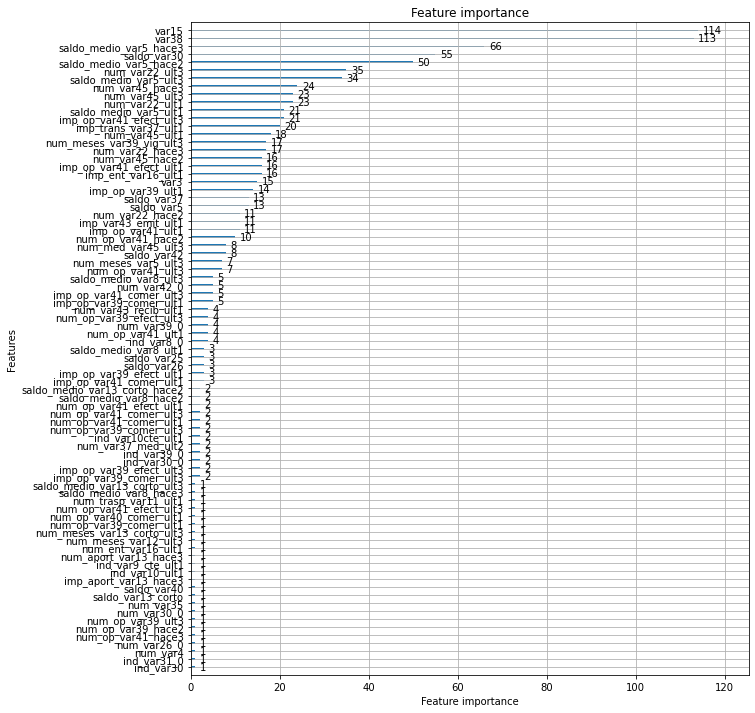

In [40]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, ax=ax)